In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

font = { 'family': 'DejaVu Sans',
    'weight' : "normal",
        'size'   : 22}
plt.rc('font', **font)

In [3]:
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
death = pd.read_csv("time_series_covid19_deaths_global.csv")

In [4]:
confirmed = confirmed.drop('Province/State', 1)
confirmed = confirmed.drop('Lat', 1)
confirmed = confirmed.drop('Long', 1)
recovered = recovered.drop('Province/State', 1)
recovered = recovered.drop('Lat', 1)
recovered = recovered.drop('Long', 1)
death = death.drop('Province/State', 1)
death = death.drop('Lat', 1)
death = death.drop('Long', 1)

In [5]:
confirmed = confirmed.groupby(by=["Country/Region"],as_index=False).sum()
recovered = recovered.groupby(by=["Country/Region"],as_index=False).sum()
death = death.groupby(by=["Country/Region"],as_index=False).sum()

In [6]:
confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542,157585,157858,157858,157858,157648,157660,157665,157725
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590,1266288,1280780,1294778,1309092,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648,1459175,1493237
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799,461157,461467,461467,461467,462219,462621,462958,463277,463573,463573,463573,464341,464751,465094,465094
193,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025,10034,10043,10047,10047,10056,10063,10069,10072,10075,10081,10086
194,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.

In [7]:
recovered[recovered.columns[0:562]]

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,...,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157,43157,50831,54332
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320
193,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251
194,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,121965,124582,126441,128312,131792,134419,137819,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239,163681,164924,166388,168052,169320,171699,173320,174728,175429,177419,179171,180535,181638,182665,18

In [8]:
death

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7299,7301,7303,7303,7305,7306,7307,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312,7316,7317,7317,7321,7322,7325,7328,7328,7329,7331,7332
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049,3053,3063,3068,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110,3115,3122,3126,3128,3130,3132,3134,3140,3144,3152,3156
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026,6030,6035,6041,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103,6111,6114,6122,6126,6132,6137,6145,6151,6155,6165,6171
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131,131,132,132,132,132,133,133,133,133,133,133,133,133,134,134,134
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730,1730,1731,1732,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735,1735,1735,1735,1736,1737,1737,1737,1737,1737,1737,1737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22531,22598,22686,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578,23685,23761,23951,24118,24243,24407,24544,24692,24882,25055,25252,25448,25658,25858,26061,26260,26483,26700,26930,27186,27402,27611,27839,28081,28333,28616,28857
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4705,4724,4731,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770,4770,4770,4779,4781,4783,4788,4789,4789,4789,4796,4796,4803,4806,4810,4810,4810,4817,4822,4823,4826,4830,4830,4830,4844,4846,4855,4855
193,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1909,1909,1915,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935,1938,1938,1939,1942,1942,1943,1943,1945,1946,1949,1950,1950,1950,1952,1953,1954,1955,1955,1956,1957,1962,1968,1971,1972,1972,1973,1973
194,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3664,3664,3664,3664,3664,3664,3664,3666,3666,3666,3666,3666,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3668,3668,3668,3668,3668,3669,3670,3670,3671,3671,3673


In [9]:
confirmed['Total'] = confirmed["12/16/21"]
recovered['Total'] = recovered["8/4/21"]
death['Total'] = death["12/16/21"]

# Total confirmed, recovered, death

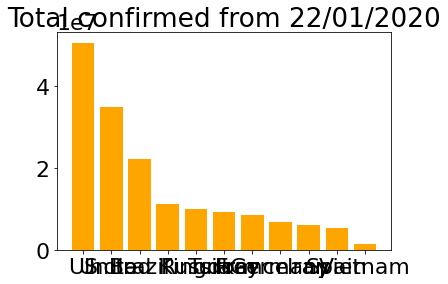

In [10]:
plt.title("Total confirmed from 22/01/2020")
df1 = confirmed.sort_values('Total',ascending = False).head(10)
entry = confirmed.loc[confirmed['Country/Region'] == 'Vietnam']
df1 = pd.concat([df1,entry])

# Make a random dataset:
height = df1["Total"]
bars = df1["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'orange')

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

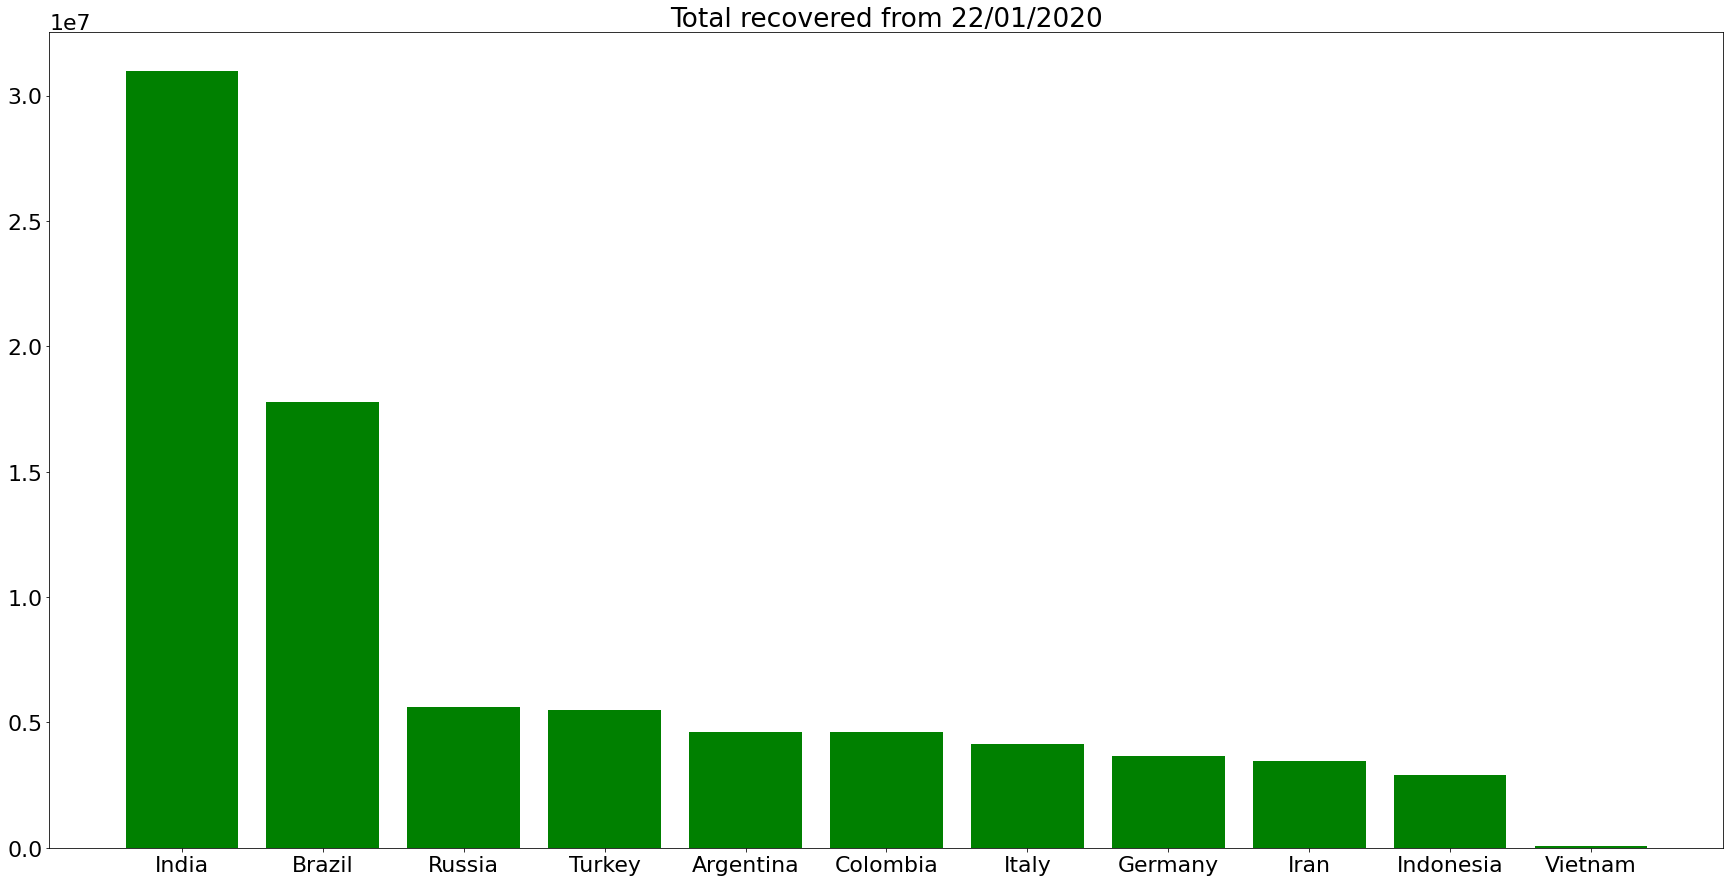

In [11]:
plt.title("Total recovered from 22/01/2020")
df2 = recovered.sort_values('Total',ascending = False).head(10)
entry = recovered.loc[recovered['Country/Region'] == 'Vietnam']
df2 = pd.concat([df2,entry])

# Make a random dataset:
height = df2["Total"]
bars = df2["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='green')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

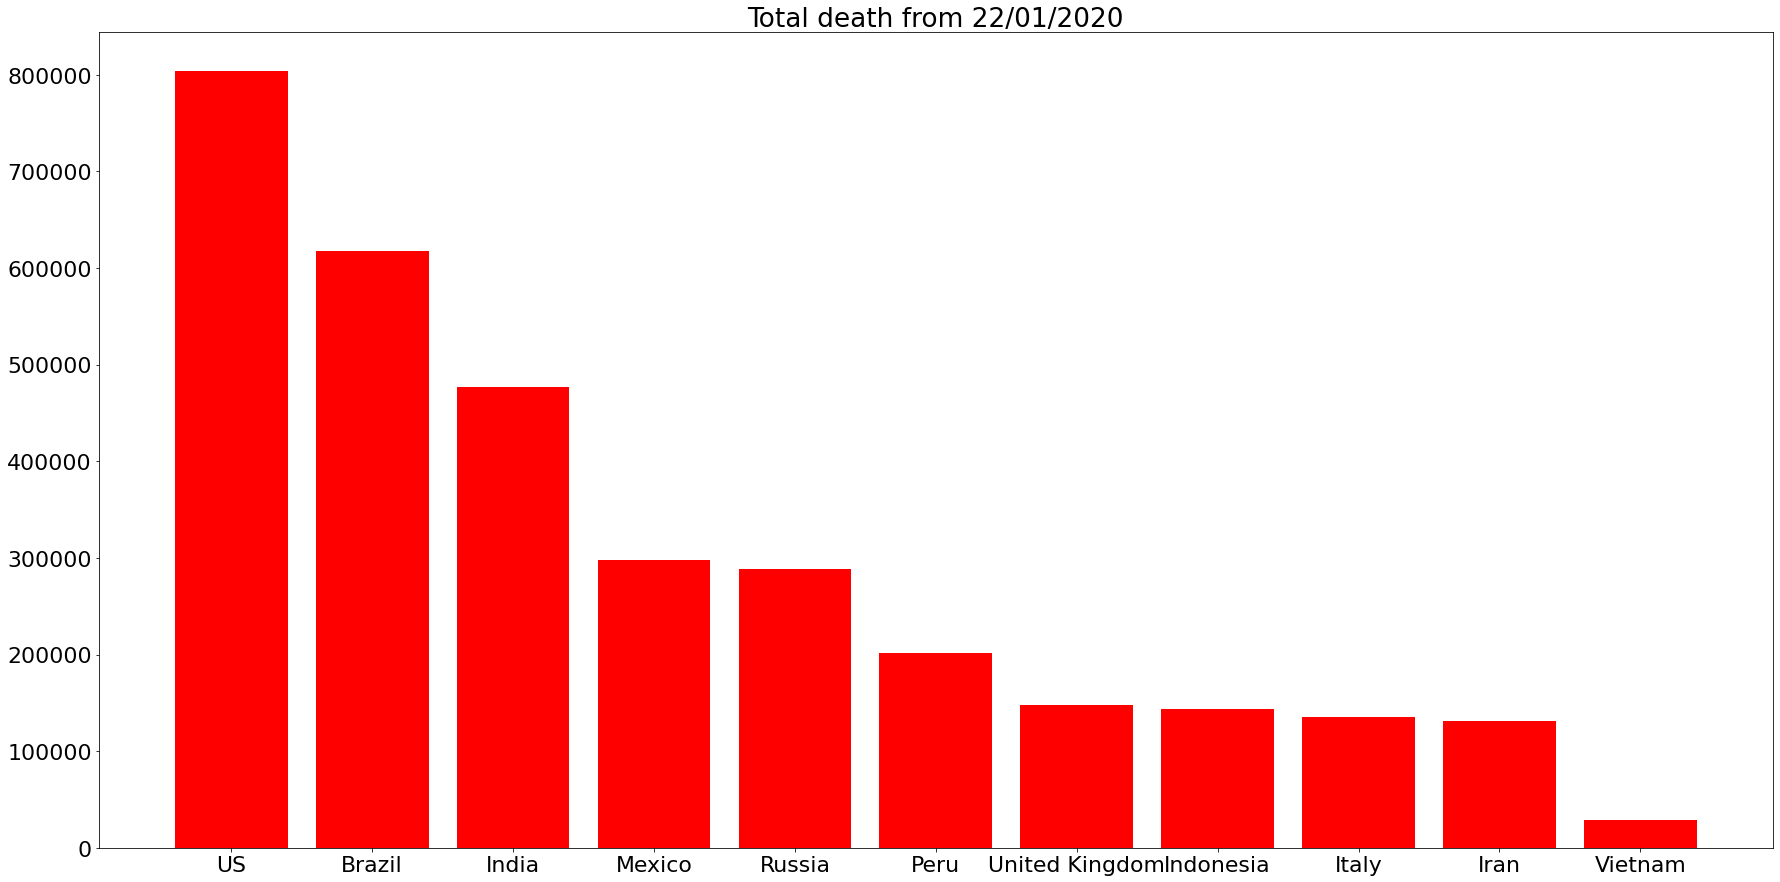

In [12]:
plt.title("Total death from 22/01/2020")
df3 = death.sort_values('Total',ascending = False).head(10)
entry = death.loc[death['Country/Region'] == 'Vietnam']
df3 = pd.concat([df3,entry])

# Make a random dataset:
height = df3["Total"]
bars = df3["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'red')

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

In [13]:
df1 = confirmed.sort_values('Total',ascending = False).head(10)
entry = confirmed.loc[confirmed['Country/Region'] == 'Vietnam']
df1 = pd.concat([df1,entry])
df1 = df1.merge(recovered, on='Country/Region', how='inner', suffixes=('', '_recover')).merge(death, on='Country/Region', how='inner', suffixes=('', '_death'))
df1

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/8/21_death,11/9/21_death,11/10/21_death,11/11/21_death,11/12/21_death,11/13/21_death,11/14/21_death,11/15/21_death,11/16/21_death,11/17/21_death,11/18/21_death,11/19/21_death,11/20/21_death,11/21/21_death,11/22/21_death,11/23/21_death,11/24/21_death,11/25/21_death,11/26/21_death,11/27/21_death,11/28/21_death,11/29/21_death,11/30/21_death,12/1/21_death,12/2/21_death,12/3/21_death,12/4/21_death,12/5/21_death,12/6/21_death,12/7/21_death,12/8/21_death,12/9/21_death,12/10/21_death,12/11/21_death,12/12/21_death,12/13/21_death,12/14/21_death,12/15/21_death,12/16/21_death,Total_death
0,US,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,17,17,25,...,756928,758405,760080,760888,763405,763902,764074,765382,766700,768357,769651,771426,771777,771913,773156,774472,776154,776544,776817,777025,777147,779116,780561,782522,786323,787855,788364,788525,789907,791516,793230,794649,796764,797179,797347,798714,800343,802510,803652,803652
1,India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,461389,461849,462189,462690,463245,463530,463655,463852,464153,464623,465082,465349,465662,465911,466147,466584,466980,467468,467933,468554,468790,468980,469247,469724,470115,470530,470530,473537,473757,473952,474111,474479,474872,475434,475636,475888,476135,476478,476869,476869
2,Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,...,609573,609756,610036,610224,610491,611222,611283,611346,611478,611851,612144,612370,612587,612659,612782,613066,613339,613642,613957,614186,614278,614376,614681,614964,615179,615400,615570,615636,615744,616018,616251,616457,616457,616457,616457,616457,616970,617271,617271,617271
3,United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,44,56,61,...,142293,142556,142772,142971,143116,143274,143337,143384,143598,143799,143999,144158,144308,144369,144414,144579,144728,144876,145036,145167,145218,145253,145414,145586,145728,145874,146001,146055,146101,146281,146444,146592,146712,146844,146896,146935,147085,147249,147396,147396
4,Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,243405,244588,245794,247000,248203,249415,250609,251796,253009,254229,255448,256669,257891,259107,260319,261526,262733,263934,265134,266337,267527,268705,269900,271091,272279,273463,274648,275824,276979,278131,279280,280427,281571,282713,283815,284909,286023,287135,288240,288240
5,Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,72314,72510,72713,72910,73127,73342,73531,73746,73973,74202,74428,74646,74847,75042,75235,75443,75618,75840,76041,76233,76446,76635,76842,77038,77230,77417,77645,77830,78017,78215,78407,78602,78778,78969,79151,79322,79503,79696,80053,80053
6,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,...,118924,118970,119003,119021,119069,119085,119102,119177,119225,119281,119333,119383,119407,119424,119521,119605,119686,119758,119818,119850,119871,119997,120112,120208,120311,120440,120488,120516,120711,120883,121017,121153,121301,121368,121416,121659,121817,121968,122156,122156
7,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,...,96731,96968,97203,97394,97623,97677,97720,97986,98278,98544,98751,98993,99067,99130,99437,99773,100123,100480,100783,100887,100960,101350,101794,102183,102573,102951,103043,103124,103240,104051,104201,105000,105510,105642,105758,106231,106685,107207,107655,107655
8,Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43

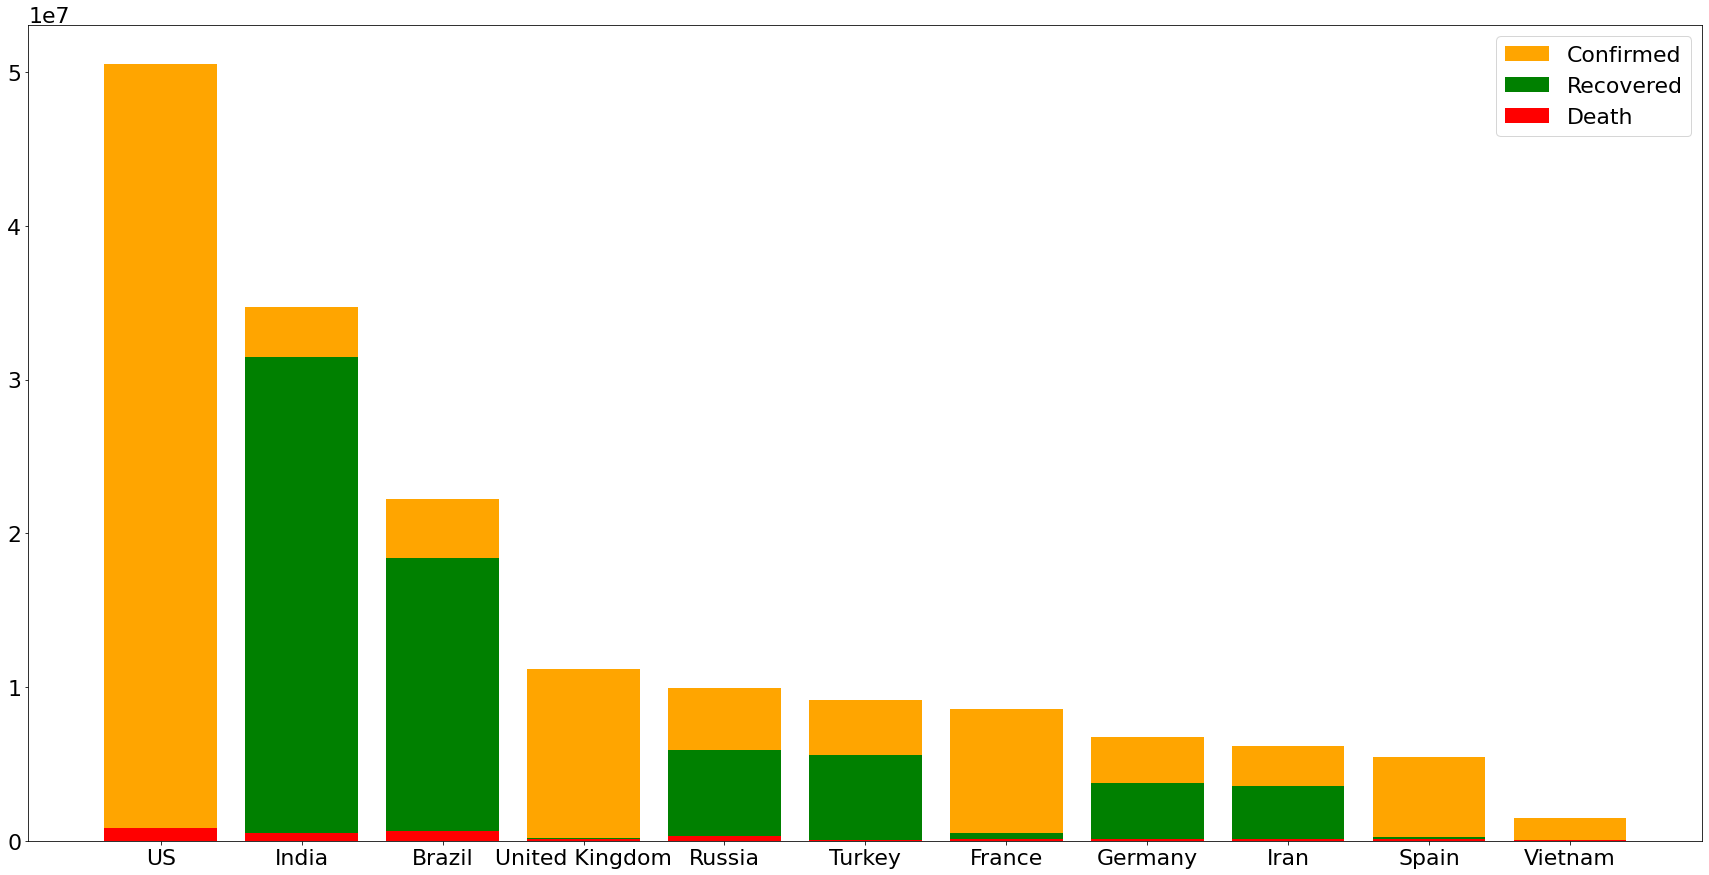

In [14]:
width = 0.8

confirmed_case   = df1['Total']
recovered_case    = df1['Total_recover'] + df1['Total_death']
death_case    = df1['Total_death']

indices = np.arange(len(confirmed_case))
height = df1["Total"]
bars = df1["Country/Region"]
y_pos = np.arange(len(bars))
plt.bar(indices, confirmed_case, width=width, 
        color='orange', label='Confirmed')
plt.bar(indices, recovered_case, width=width, 
        color='g', label='Recovered')
plt.bar(indices, death_case, width=width, 
        color='r', label='Death')


plt.xticks(y_pos, bars)

plt.legend()

plt.show()

# Daily new infections

In [15]:
confirmed_increasement = confirmed
confirmed_increasement = confirmed_increasement.drop('Total', 1)
confirmed_increasement = confirmed_increasement.drop('Country/Region', 1)
confirmed_increasement_temp = confirmed_increasement.copy()
confirmed_increasement_temp2 = confirmed_increasement.copy()
confirmed_increasement_temp2.insert(0, "init", 0)
confirmed_increasement_temp2 = confirmed_increasement_temp2.drop("12/16/21",1)

In [16]:
confirmed_increasement_temp3 = confirmed_increasement_temp.to_numpy() - confirmed_increasement_temp2.to_numpy()
confirmed_increasement = pd.DataFrame(confirmed_increasement_temp3, columns = confirmed.columns[1:-1])
confirmed_increasement["Country/Region"] = confirmed["Country/Region"]

In [17]:
confirmed_increasement['Peak'] = confirmed_increasement.max(numeric_only=True, axis=1)

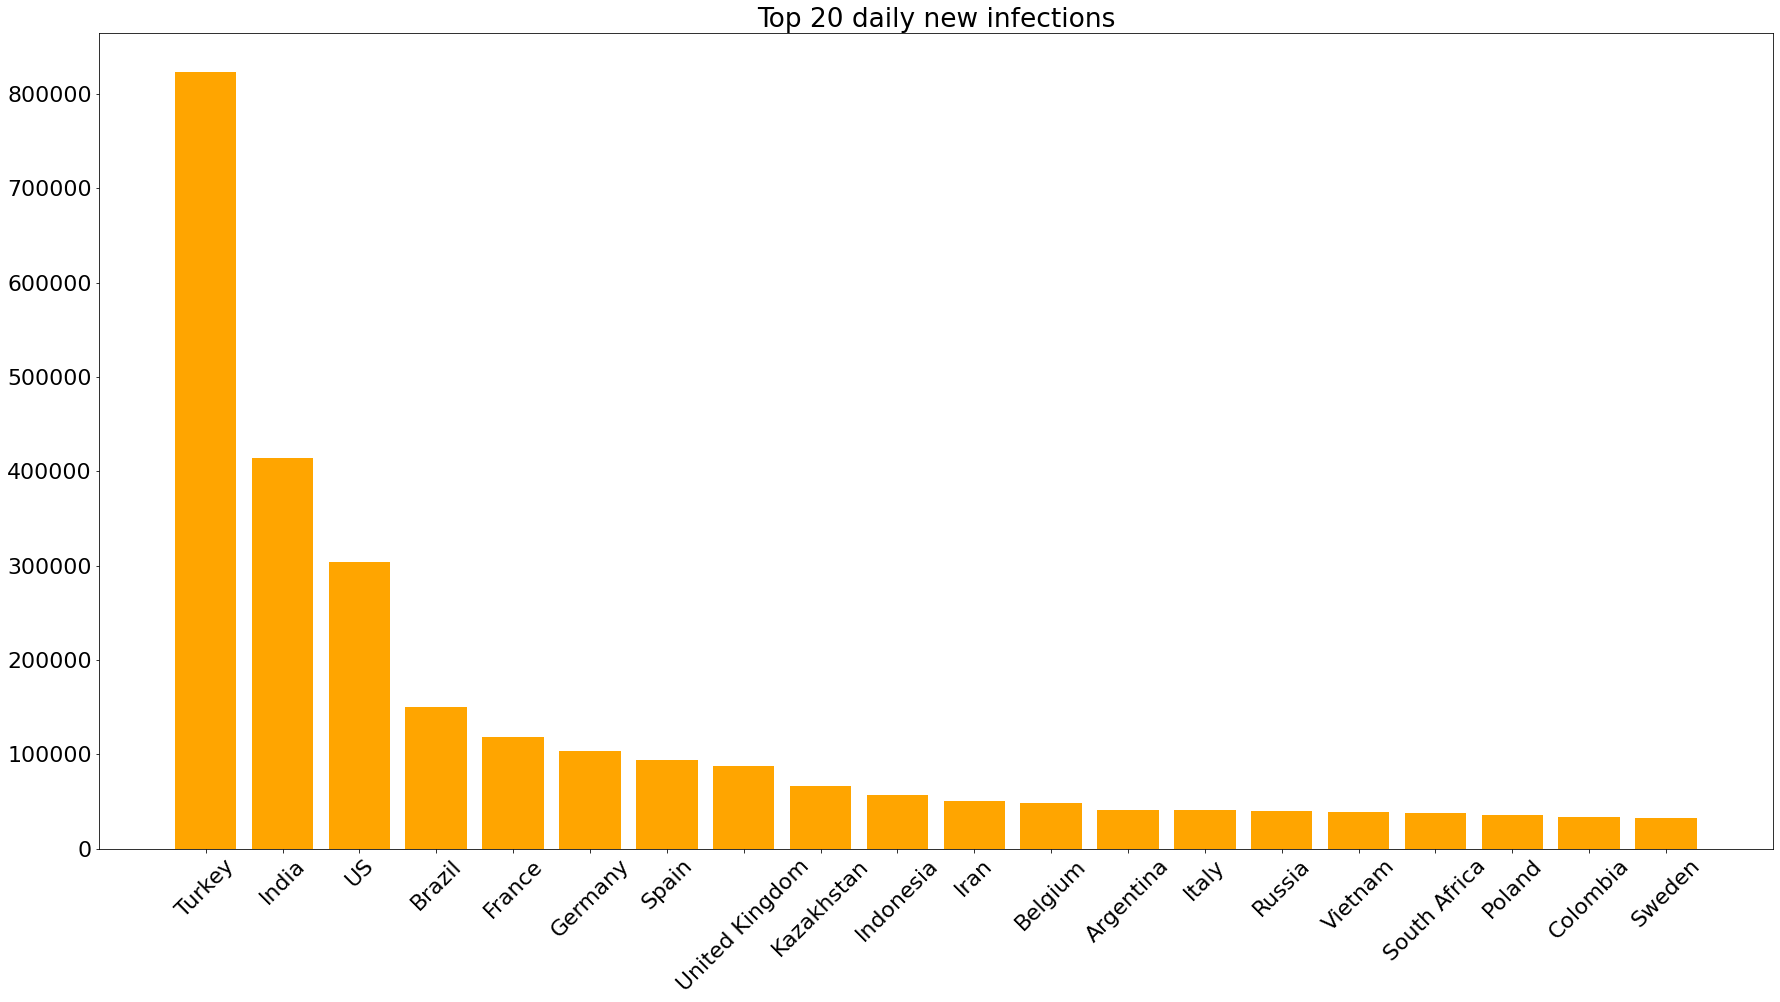

In [18]:
plt.title("Top 20 daily new infections")
df4 = confirmed_increasement.sort_values('Peak',ascending = False).head(20)

# Make a random dataset:
height = df4["Peak"]
bars = df4["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='orange')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

In [19]:
death_increasement = death
death_increasement = death_increasement.drop('Total', 1)
death_increasement = death_increasement.drop('Country/Region', 1)
death_increasement_temp = death_increasement.copy()
death_increasement_temp2 = death_increasement.copy()
death_increasement_temp2.insert(0, "init", 0)
death_increasement_temp2 = death_increasement_temp2.drop("12/16/21",1)
death_increasement_temp3 = death_increasement_temp.to_numpy() - death_increasement_temp2.to_numpy()
death_increasement = pd.DataFrame(death_increasement_temp3, columns = confirmed.columns[1:-1])
death_increasement["Country/Region"] = death["Country/Region"]
death_increasement['Peak'] = death_increasement.max(numeric_only=True, axis=1)

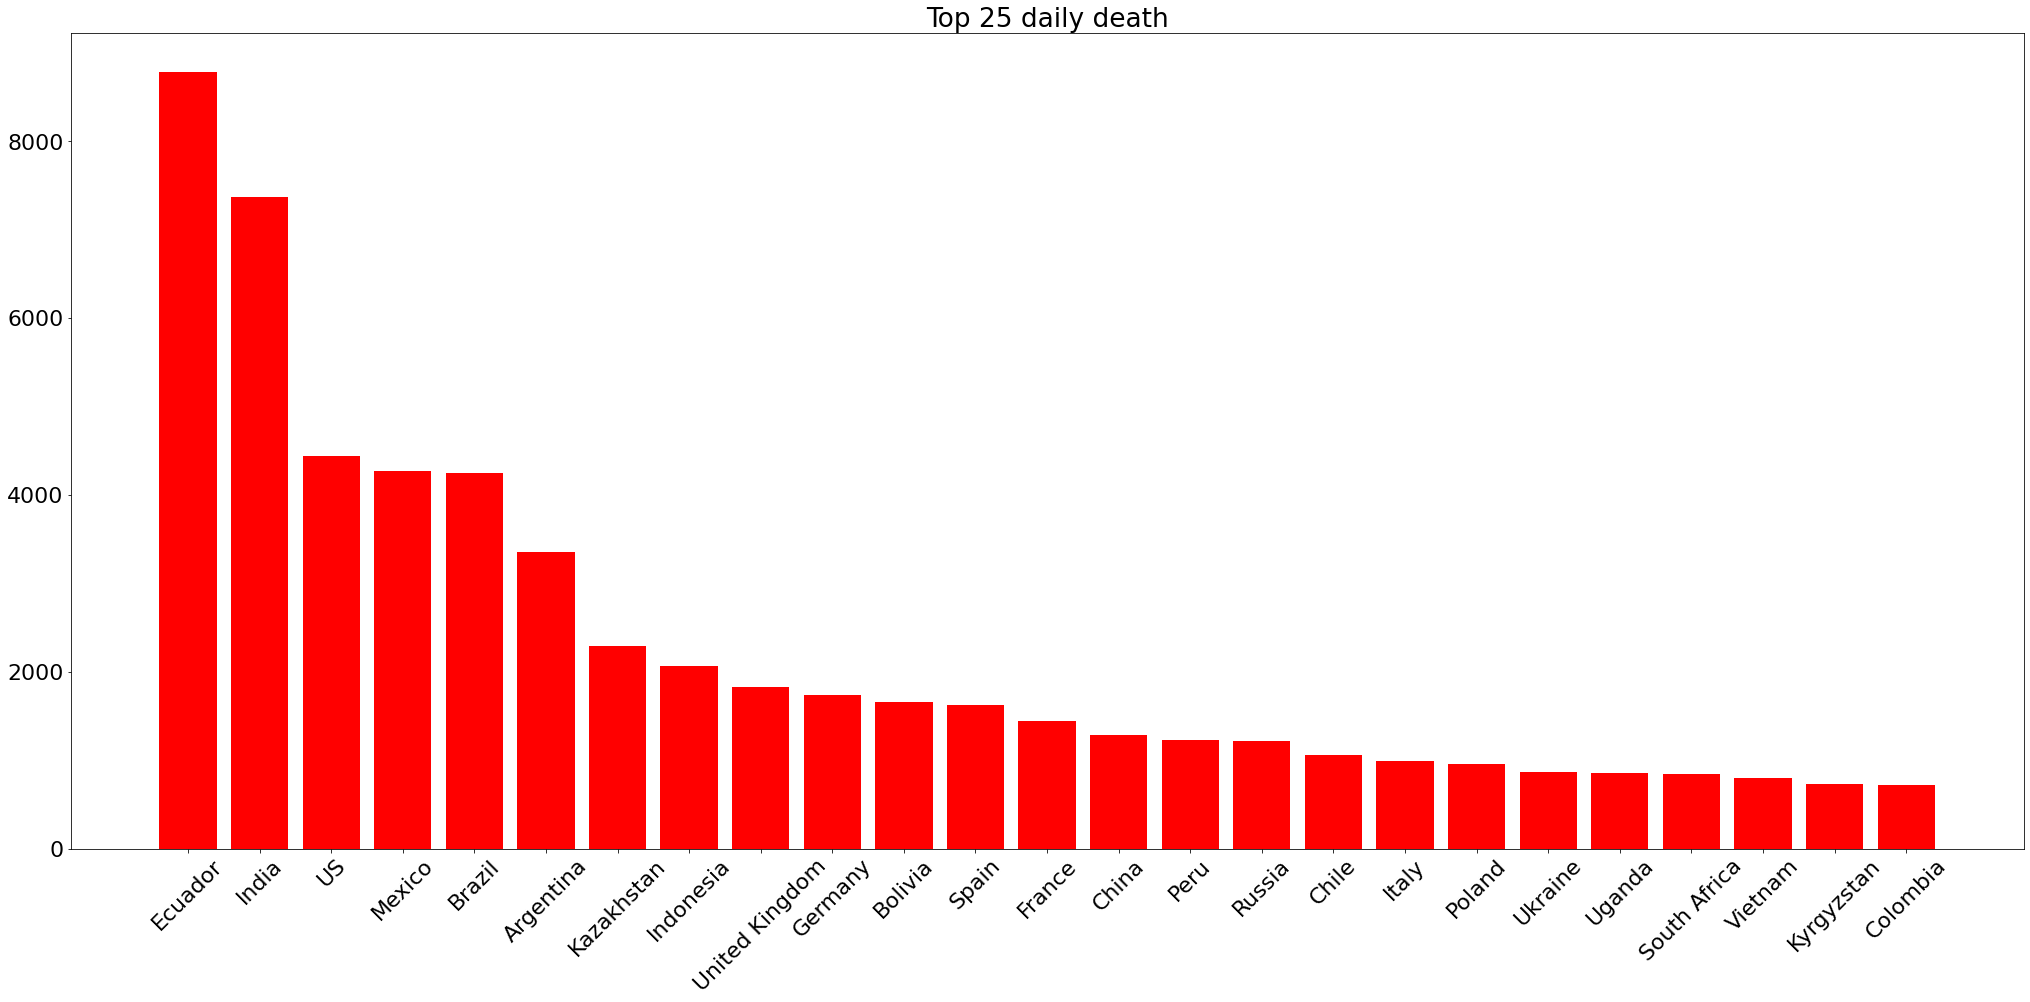

In [20]:
plt.title("Top 25 daily death")
df5 = death_increasement.sort_values('Peak',ascending = False).head(25)

# Make a random dataset:
height = df5["Peak"]
bars = df5["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='red')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

# Rate of infection

In [21]:
population = pd.read_csv("2021_population.csv")
population["country"] = population["country"].replace("United States", 'US')
population

FileNotFoundError: ignored

In [ ]:
population.rename(columns={"country": ""})

In [ ]:
confirmed_population = pd.merge(confirmed, population, left_on='Country/Region', right_on='country')

In [ ]:
confirmed_population["2021_last_updated"] = confirmed_population["2021_last_updated"].str.replace(',','' )
confirmed_population['2021_last_updated'] = pd.to_numeric(confirmed_population['2021_last_updated'])
confirmed_population["confirmed_rate"] = confirmed_population["Total"]/confirmed_population["2021_last_updated"]*100

In [ ]:
confirmed_population

In [ ]:
plt.title("Confirmed rate from 22/01/2020 (%)")
df6 = confirmed_population.sort_values('confirmed_rate',ascending = False).head(10)
entry = confirmed_population.loc[confirmed_population['Country/Region'] == 'Vietnam']
df6 = pd.concat([df6,entry])

# Make a random dataset:
height = df6["confirmed_rate"]
bars = df6["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

# Region

In [22]:
location = pd.read_csv("countryContinent.csv", encoding= 'unicode_escape')
location["country"] = location["country"].replace("United States", 'US')
location

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [23]:
confirmed_location = pd.merge(confirmed, location, left_on='Country/Region', right_on='country')
confirmed_location

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,Total,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542,157585,157858,157858,157858,157648,157660,157665,157725,157725,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,204928,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,213745,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65648,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,190332,190584,190850,191122,191334,191576,191750,191956,192175,192381,192599,192831,193065,193208,193424,193633,193893,194105,194333,194556,194703,194904,195098,195246,195524,195747,195958,196094,196303,196522,196522,Uzbekistan,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,142.0,143.0
165,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,Vanuatu,VU,VUT,548,ISO 3166-2:VU,Oceania,Melanesia,9.0,54.0
166,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025,10034,10043,10047,10047,10056,10063,10069,10072,10075,10081,10086,10086,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
167,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,210020,210036,210043,210057,210070,210073,210090,210099,210112,210118,210138,210143,210150,210169,210195,210220,210262,210294,210312,210327,210374,210436,210562,2107

In [24]:
confirmed_location_continent_group = confirmed_location.groupby(by=["continent"],as_index=False).sum()
confirmed_location_continent_group

,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,Total,country_code,region_code,sub_region_code
0,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,...,8341359,8344566,8347059,8348654,8352831,8356036,8359522,8364114,8367529,8370477,8373769,8377032,8399201,8403976,8409840,8415484,8421021,8426580,8433033,8441211,8453991,8469841,8491067,8511369,8525877,8536021,8555138,8587864,8619271,8645022,8676930,8721739,8738087,8775784,8816337,8857407,8857407,22440,98.0,684.0
1,Americas,0,0,0,0,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,11,12,14,15,17,19,29,...,47023336,47055013,47085506,47104364,47125594,47143929,47174522,47204701,47233502,47261572,47281389,47299982,47324147,47355506,47392948,47423999,47446936,47464913,47486197,47508649,47539761,47567531,47599539,47621225,47640503,47661094,47686045,47711619,47743852,47757216,47776513,47792823,47806242,47846466,47875862,47899378,47899378,11230,608.0,552.0
2,Asia,554,650,930,1422,2096,2901,5544,6129,8193,9866,11963,16707,19794,23801,27541,30690,34217,36935,39958,42492,44528,44905,60054,66537,68612,70722,72653,74446,74863,75331,75824,77304,77341,77581,78145,78615,79096,79461,79930,...,72056449,72130065,72196077,72259338,72322529,72388323,72461168,72531199,72598199,72667407,72727631,72786784,72855846,72926564,73001293,73065780,73121415,73177619,73236120,73301597,73365596,73426723,73482332,73534316,73601109,73651098,73708228,73771472,73828266,73881454,73932001,73975622,74020697,74074892,74127136,74198441,74198441,16170,5396.0,3499.0
3,Europe,0,0,2,3,3,4,8,10,10,13,19,21,23,24,24,24,26,31,33,33,35,35,35,35,36,36,36,36,36,36,53,95,188,262,366,525,782,1073,1442,...,47295081,47518573,47696036,47828930,48037900,48274043,48556704,48832400,49103005,49316202,49478853,49744193,50012118,50338271,50654602,50956523,51176965,51345114,51625620,51918424,52244247,52570244,52884757,53117293,53292535,53504242,53858042,54126260,54482168,54772318,54980359,55142814,55389248,55681784,55993738,56287988,56287988,15897,5850.0,4384.0
4,Oceania,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,26,...,280126,282044,283572,284864,286164,287658,289390,291095,293320,294934,296765,298029,299842,301657,303600,305308,306689,308151,309455,311108,313066,314802,316653,318010,319579,321129,323046,324850,326694,328621,330267,332304,334381,337292,340825,344706,344706,5191,99.0,615.0


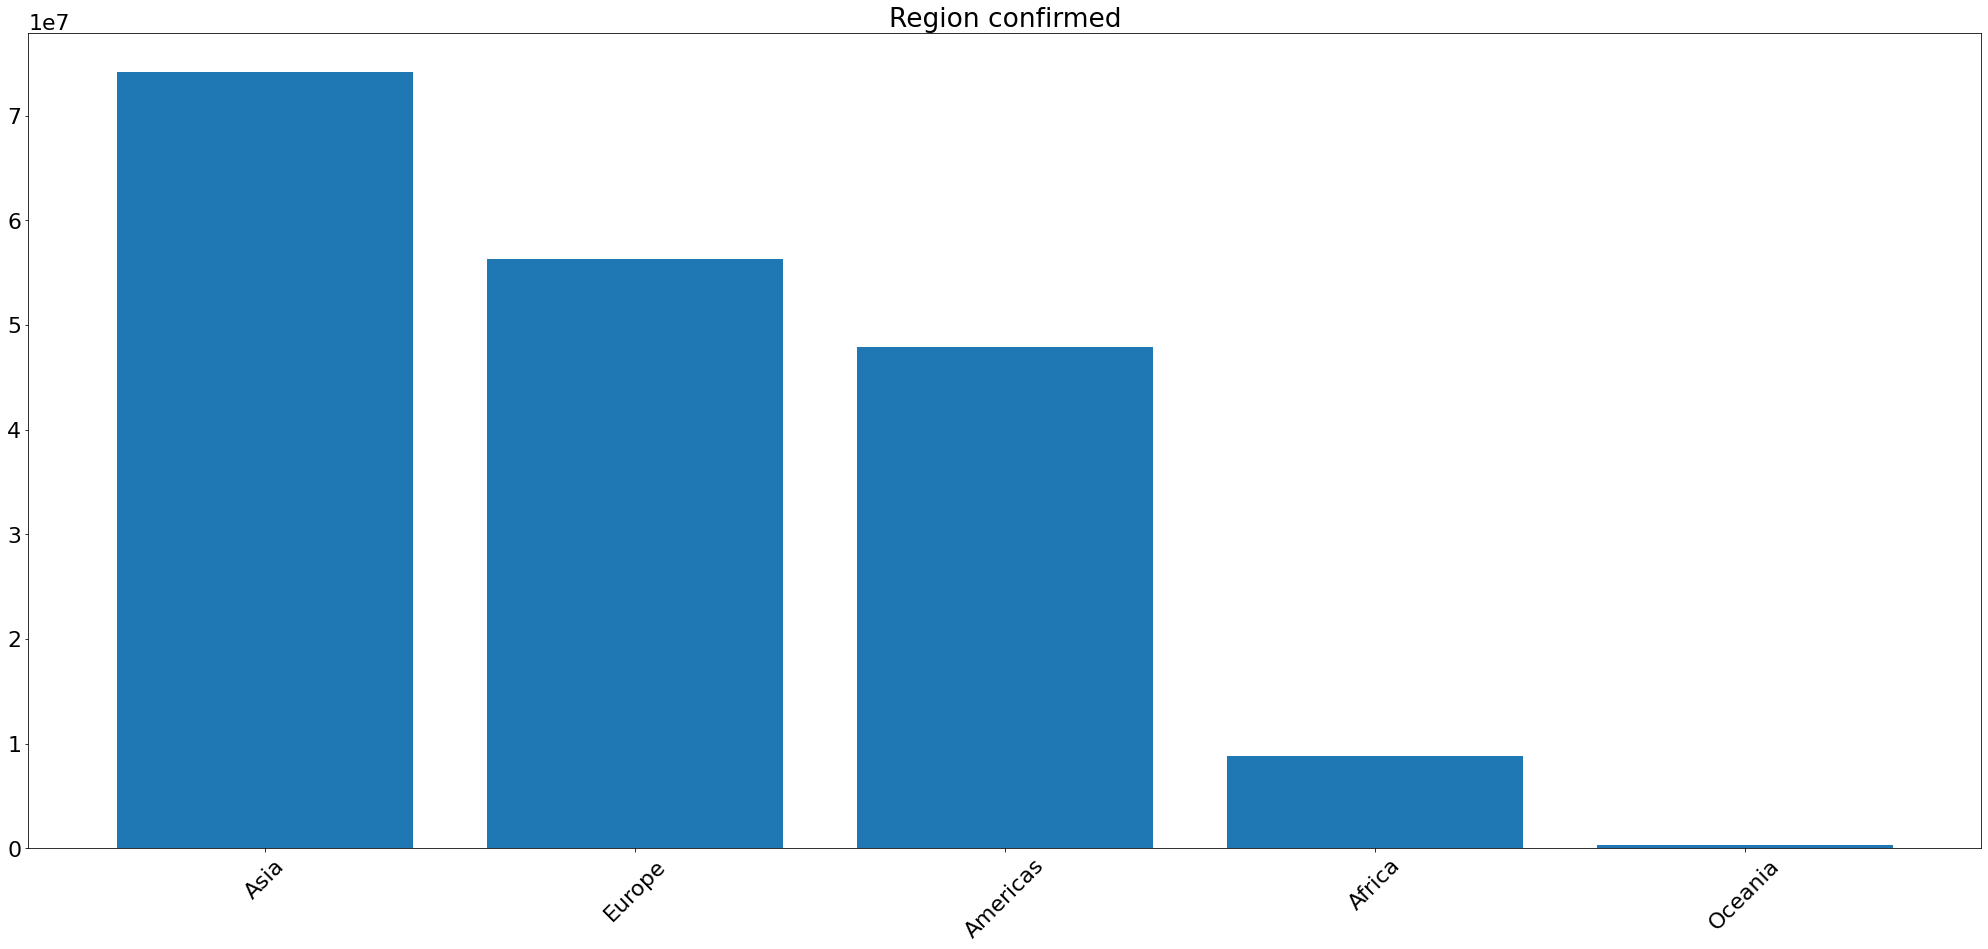

In [25]:
plt.title("Region confirmed")
df9 = confirmed_location_continent_group.sort_values('Total',ascending = False)

# Make a random dataset:
height = df9["Total"]
bars = df9["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

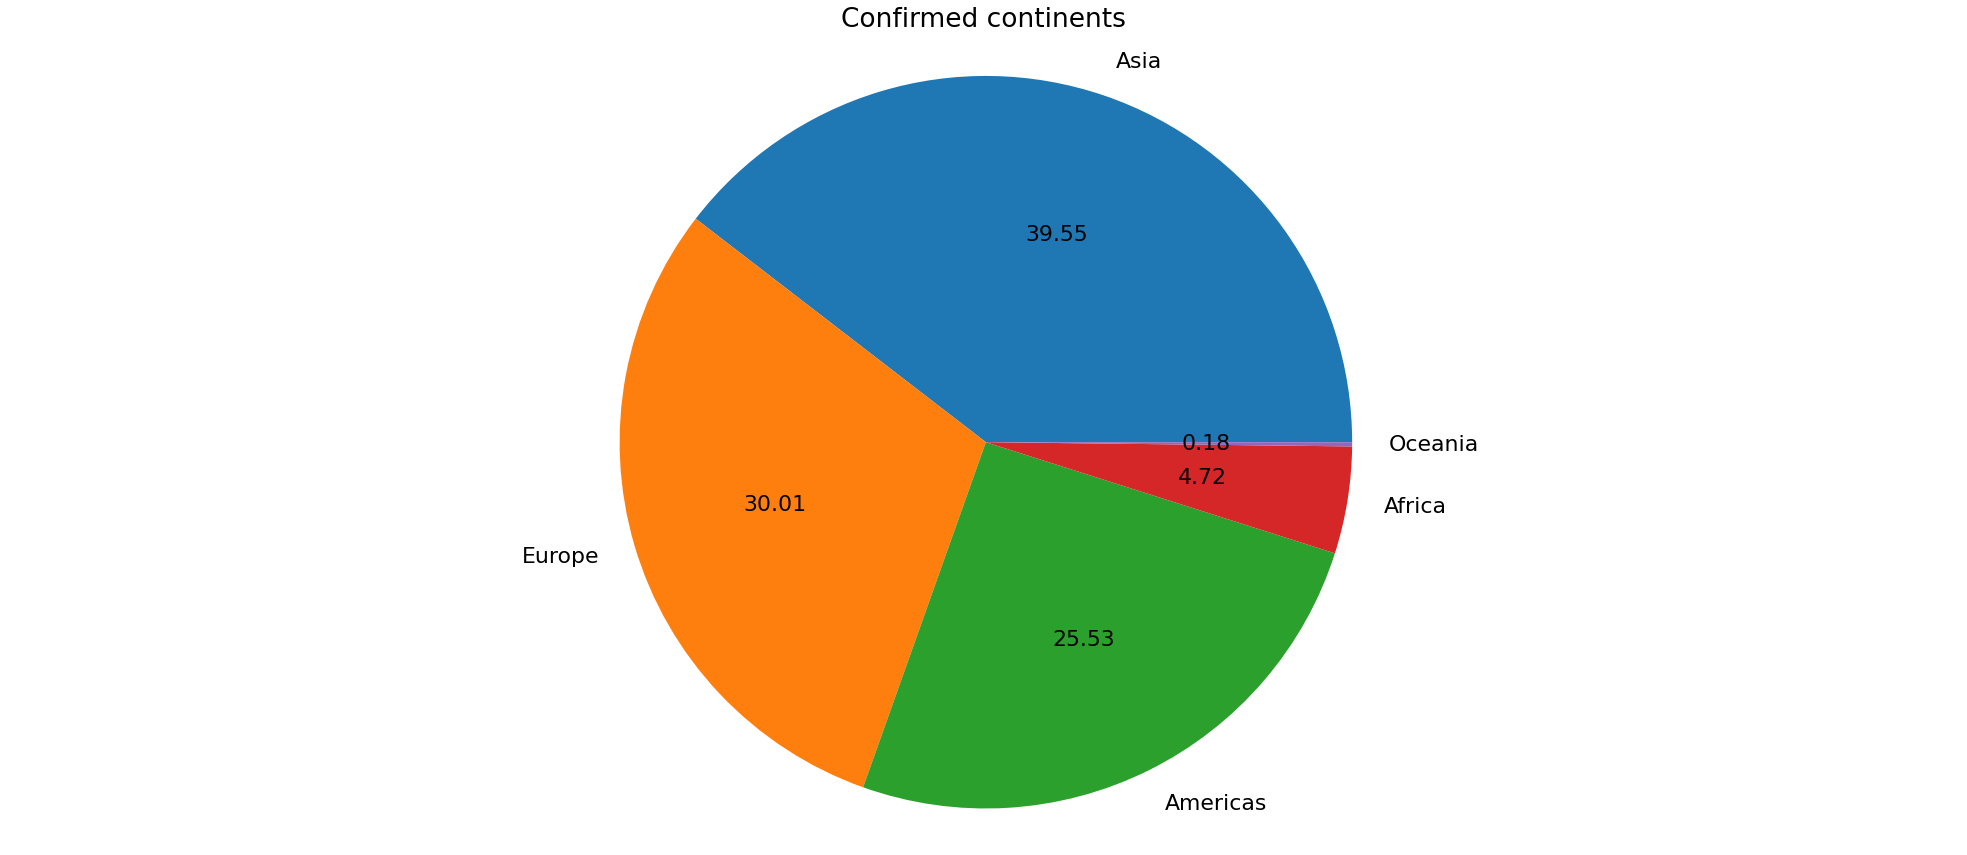

In [28]:
labels = df9["continent"]
sizes = df9["Total"]

def absolute_value(val):
    return np.round(val,2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Confirmed continents")
plt.axis('equal')
plt.show()

# Asia region

In [29]:
confirmed_location_subregion_group = confirmed_location[confirmed_location["continent"] == "Asia"].groupby(by=["sub_region"],as_index=False).sum()
confirmed_location_subregion_group

,sub_region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,Total,country_code,region_code,sub_region_code
0,Central Asia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1423521,1425244,1426851,1428231,1429499,1431045,1432610,1434196,1435701,1437174,1438378,1439448,1440746,1442082,1443434,1444710,1445921,1446999,1447934,1449024,1450100,1451103,1452211,1453276,1454199,1455007,1456033,1457064,1458046,1458881,1459781,1460615,1461251,1461979,1462843,1463647,1463647,2437,568.0,572.0
1,Eastern Asia,550,645,922,1408,2079,2881,5516,6094,8152,9817,11911,16650,19736,23729,27463,30610,34133,36838,39853,42380,44413,44787,59928,66401,68467,70573,72501,74290,74704,75172,75662,77138,77171,77401,77927,78358,78818,79164,79601,...,2205256,2207389,2207674,2209010,2209112,2210914,2211928,2212699,2213412,2214045,2214507,2215098,2215233,2216676,2217393,2217730,2218496,2218600,2219301,2220055,2220687,2221097,2221829,2222339,2222652,2222805,2223279,2223794,2224642,2224869,2225517,2225815,2225960,2226353,2226923,2227457,2227457,1044,426.0,90.0
2,South-Eastern Asia,4,5,8,13,16,18,26,29,34,42,45,48,48,62,68,70,74,85,93,99,102,105,113,123,132,135,138,142,145,145,146,146,150,150,154,159,160,163,177,...,11956040,11975290,11992844,12009102,12024462,12039118,12057131,12072126,12090972,12107082,12122878,12136318,12150221,12165237,12186912,12200828,12208907,12220664,12231376,12242479,12254738,12267385,12279290,12291513,12305768,12314742,12320698,12334965,12345921,12355923,12365299,12369566,12377139,12384808,12392812,12404971,12404971,3634,994.0,245.0
3,Southern Asia,0,0,0,1,1,2,2,2,3,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,10,12,12,12,14,14,...,38877798,38891374,38903981,38917239,38928069,38939965,38953944,38966795,38978885,38990987,39001082,39010453,39022410,39033373,39045620,39055724,39065969,39075701,39084504,39095248,39106871,39117946,39128296,39129750,39148736,39157257,39167459,39178680,39188772,39198778,39208294,39217228,39224624,39235183,39244949,39254005,39254005,2190,1136.0,272.0
4,Western Asia,0,0,0,0,0,0,0,4,4,4,4,5,5,5,5,5,5,7,7,8,8,8,8,8,8,9,9,9,9,9,11,15,15,20,52,86,106,120,138,...,17593834,17630768,17664727,17695756,17731387,17767281,17805555,17845383,17879229,17918119,17950786,17985467,18027236,18069196,18107934,18146788,18182122,18215655,18253005,18294791,18333200,18369192,18400706,18437438,18469754,18501287,18540759,18576969,18610885,18643003,18673110,18702398,18731723,18766569,18799609,18848361,18848361,6865,2272.0,2320.0


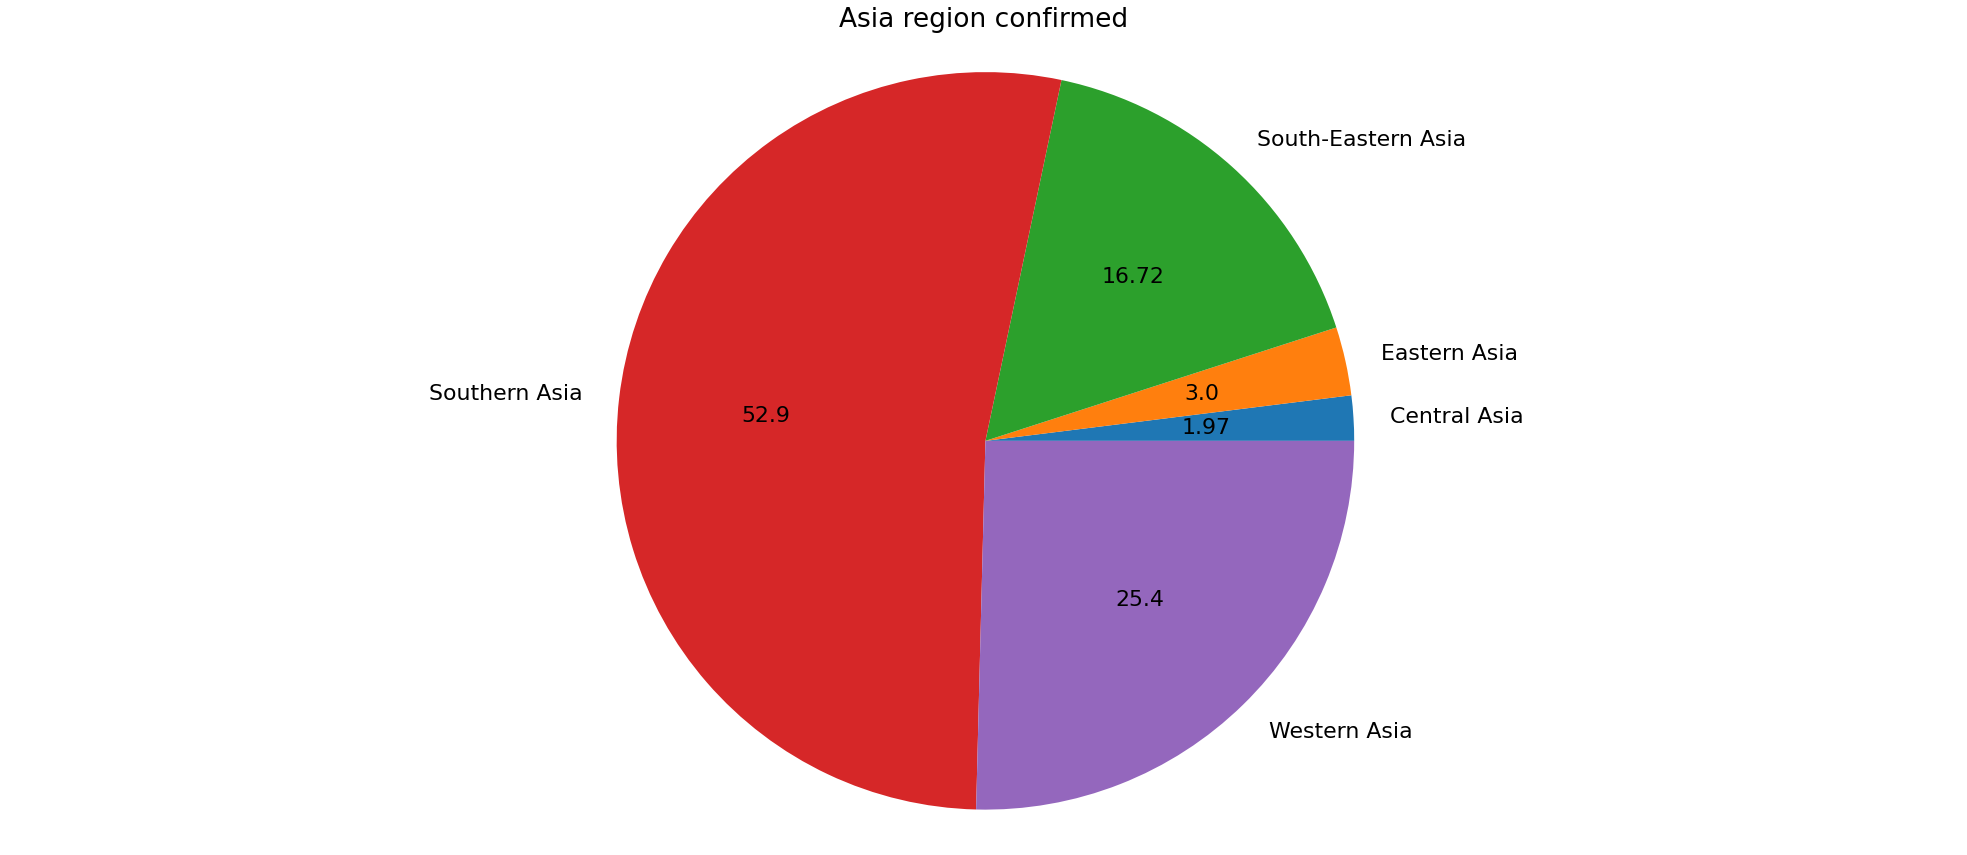

In [34]:
labels = confirmed_location_subregion_group["sub_region"]
sizes = confirmed_location_subregion_group["Total"]

def absolute_value(val):
    return np.round(val, 2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Asia region confirmed")
plt.axis('equal')
plt.show()

# Death of regions


In [36]:
death_location = pd.merge(death, location, left_on='Country/Region', right_on='country')
death_location_continent_group = death_location.groupby(by=["continent"],as_index=False).sum()
death_location_continent_group

,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,Total,country_code,region_code,sub_region_code
0,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,216162,216316,216438,216509,216694,216861,217004,217161,217264,217367,217480,217597,217767,217909,218124,218245,218366,218438,218595,218738,218894,219045,219168,219266,219347,219484,219607,219763,219870,219980,220134,220242,220316,220513,220659,220786,220786,22440,98.0,684.0
1,Americas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1533740,1534264,1535418,1535861,1536383,1536779,1537757,1538647,1539132,1539773,1540222,1540725,1541231,1542066,1543205,1543911,1544365,1544879,1545485,1546031,1547006,1547501,1548427,1548752,1549277,1549939,1550443,1551050,1552174,1552461,1552896,1553374,1553578,1554425,1555418,1555854,1555854,11230,608.0,552.0
2,Asia,17,18,26,42,56,82,131,133,171,213,259,362,426,492,564,634,719,806,906,1013,1113,1118,1371,1523,1665,1768,1866,2006,2119,2241,2241,2446,2448,2598,2669,2721,2751,2796,2844,...,1011393,1012795,1013890,1014892,1015897,1016953,1018404,1019810,1020923,1022012,1022945,1023990,1025241,1026391,1027735,1028899,1030168,1031068,1031969,1032859,1034077,1035040,1036143,1036898,1040561,1041416,1042128,1043085,1044126,1045035,1046191,1046981,1047782,1048526,1049432,1050549,1050549,16170,5396.0,3499.0
3,Europe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,3,4,8,11,14,19,23,32,...,907062,909375,911332,912603,914923,917748,920827,923482,926109,928054,929198,931576,934504,937485,940263,942824,944743,945978,948515,951447,954358,957099,959887,961720,962764,964978,968269,970915,974073,976953,978699,979836,982190,985166,988123,990765,990765,15897,5850.0,4384.0
4,Oceania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3001,3020,3025,3038,3064,3073,3088,3102,3157,3163,3170,3233,3238,3257,3265,3271,3276,3282,3292,3298,3309,3325,3334,3342,3348,3357,3387,3397,3399,3417,3421,3437,3444,3449,3459,3468,3468,5191,99.0,615.0


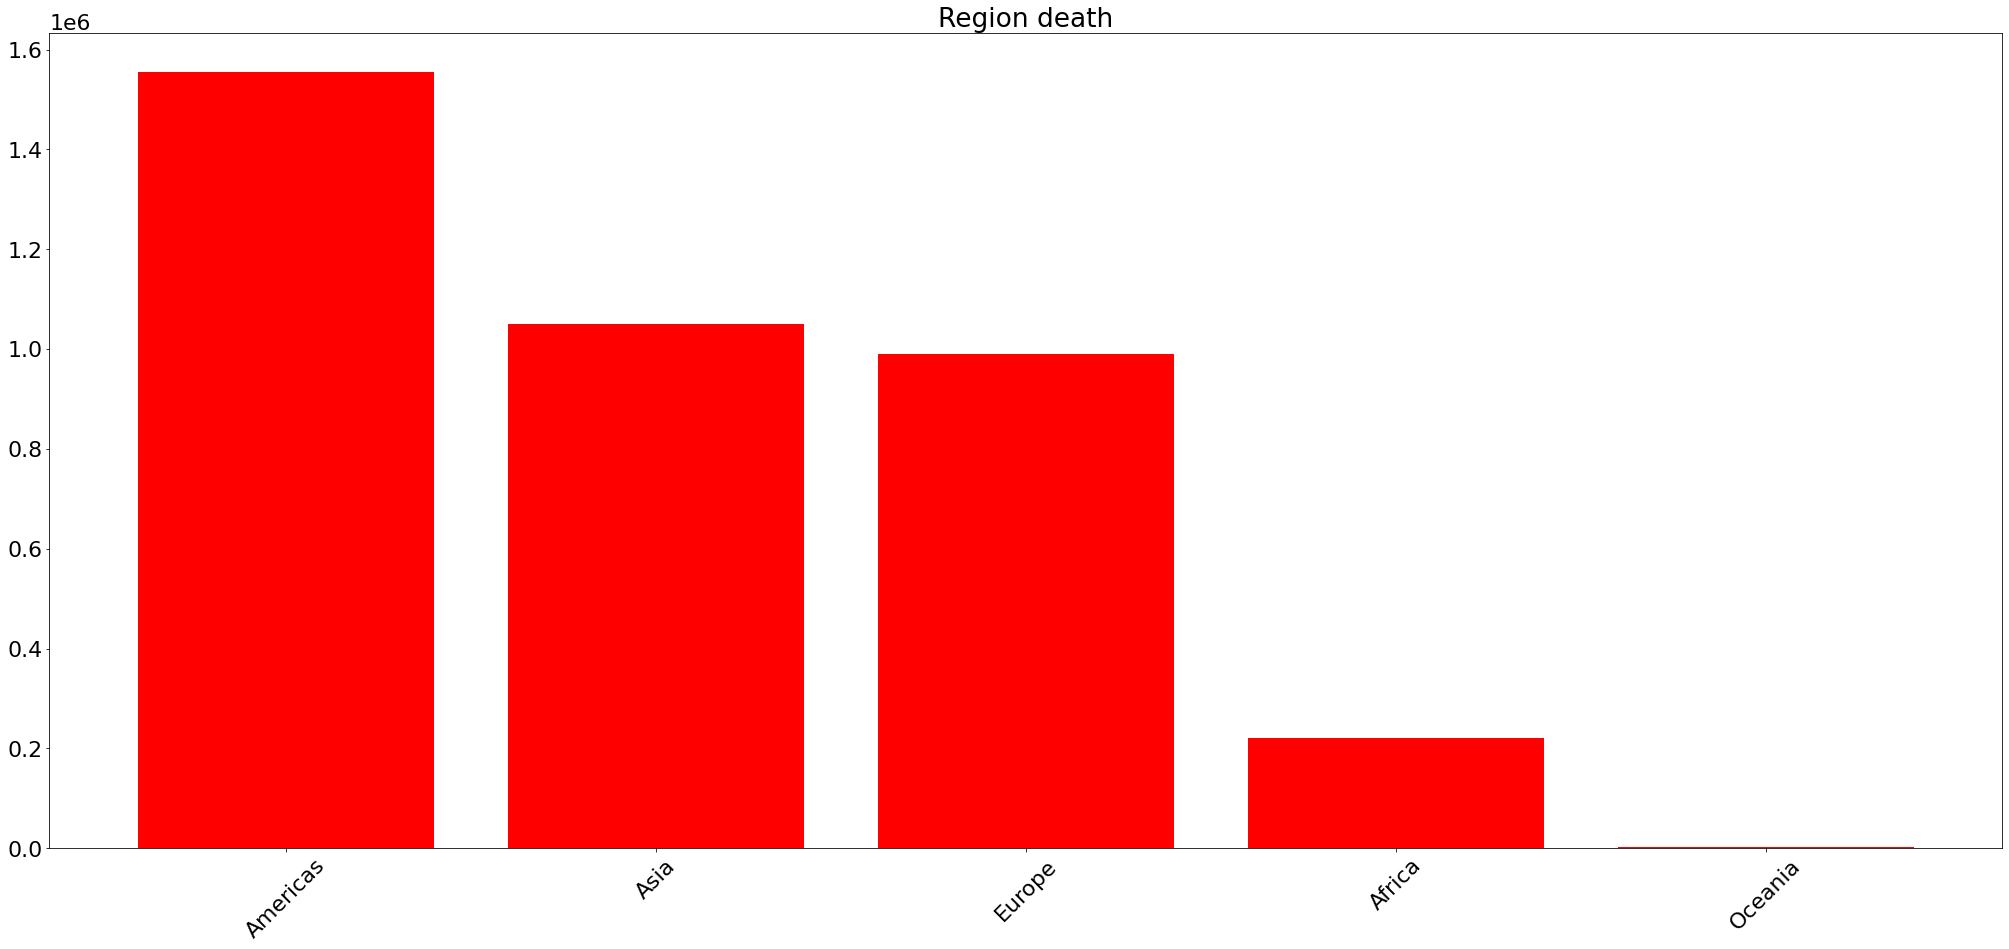

In [103]:
plt.title("Region death")
df10 = death_location_continent_group.sort_values('Total',ascending = False)

# Make a random dataset:
height = df10["Total"]
bars = df10["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'r')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

# Death of Asia

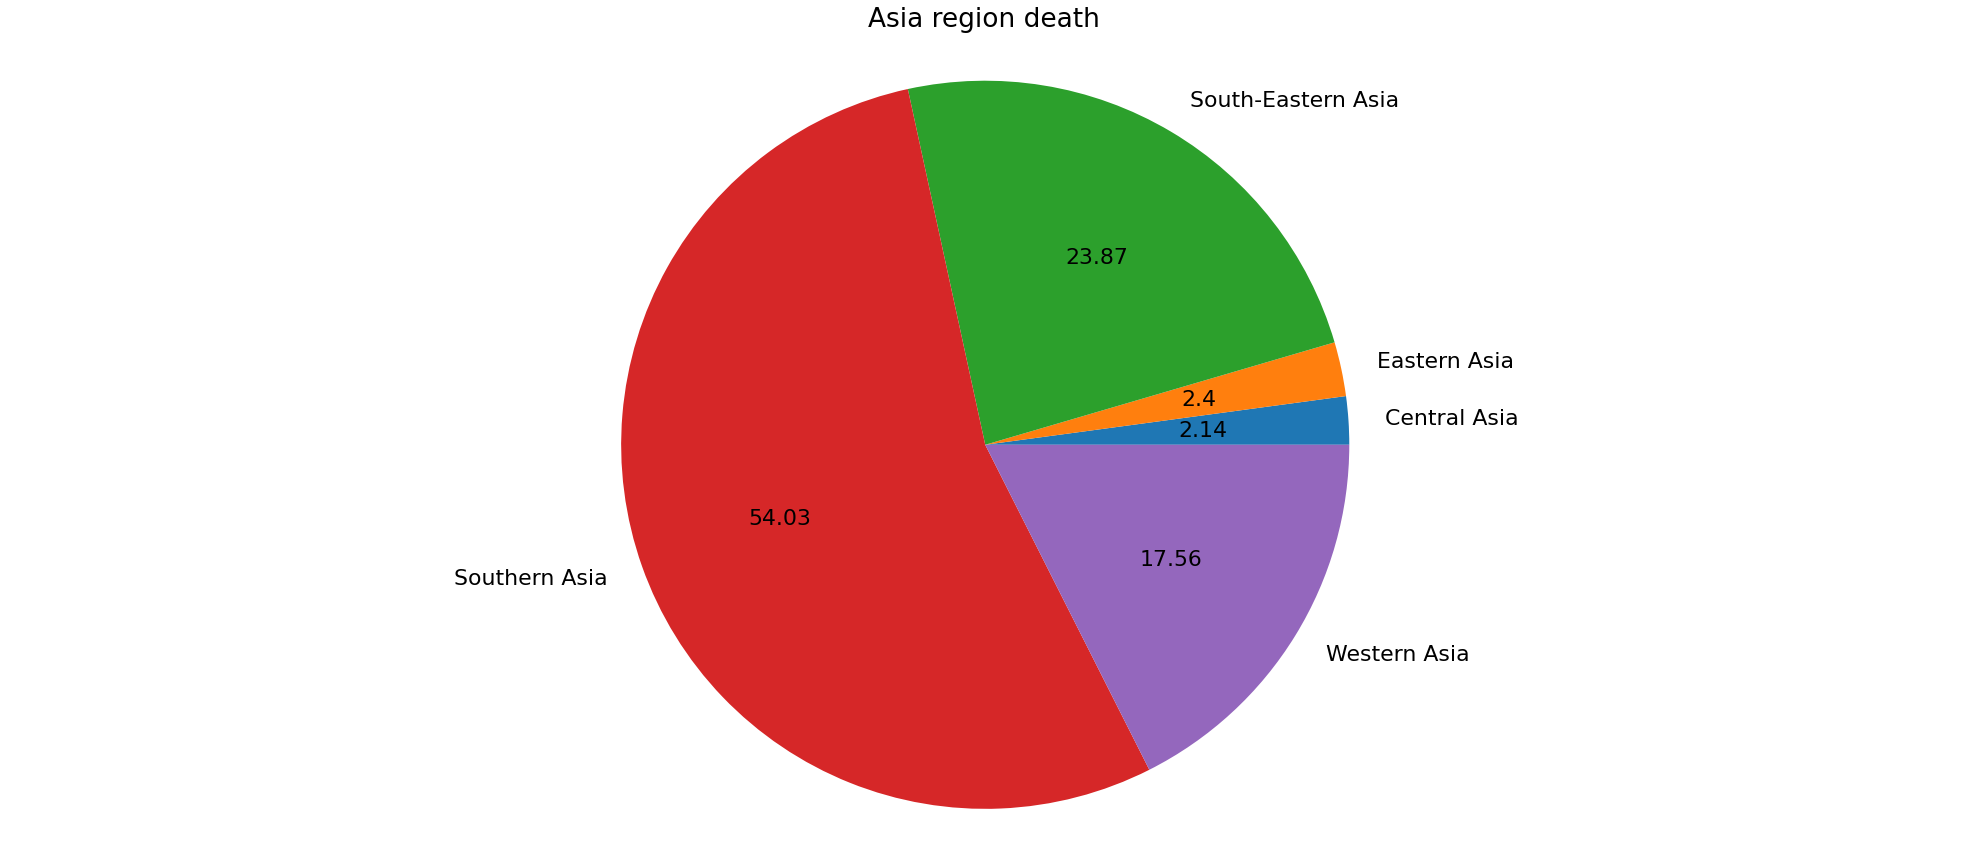

In [44]:
death_location_subregion_group = death_location[death_location["continent"] == "Asia"].groupby(by=["sub_region"],as_index=False).sum()
labels = death_location_subregion_group["sub_region"]
sizes = death_location_subregion_group["Total"]

def absolute_value(val):
    return np.round(val, 2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Asia region death")
plt.axis('equal')
plt.show()

## Vietnam time series

In [62]:
confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,Total
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542,157585,157858,157858,157858,157648,157660,157665,157725,157725
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,204928
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,213745
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590,1266288,1280780,1294778,1309092,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648,1459175,1493237,1493237
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799,461157,461467,461467,461467,462219,462621,462958,463277,463573,463573,463573,464341,464751,465094,465094,465094
193,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025,10034,10043,10047,10047,10056,10063,10069,10072,10075,10081,10086,10086
194,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.

In [76]:
vn_cf_timesr = confirmed.loc[confirmed['Country/Region'] == "Vietnam"]
vn_d_timesr = death.loc[confirmed['Country/Region'] == "Vietnam"]
vn_r_timesr = recovered.loc[confirmed['Country/Region'] == "Vietnam"]

In [77]:
vn_cf_timesr = vn_cf_timesr.drop('Country/Region', 1)
vn_cf_timesr = vn_cf_timesr.drop('Total', 1)
vn_d_timesr = vn_d_timesr.drop('Country/Region', 1)
vn_d_timesr = vn_d_timesr.drop('Total', 1)
vn_r_timesr = vn_r_timesr.drop('Country/Region', 1)
vn_r_timesr = vn_r_timesr.drop('Total', 1)


In [93]:
vn_cf_timesr_lst = vn_cf_timesr.values.flatten().tolist()
vn_d_timesr_lst = vn_d_timesr.values.flatten().tolist()
vn_r_timesr_lst = vn_r_timesr.values.flatten().tolist()

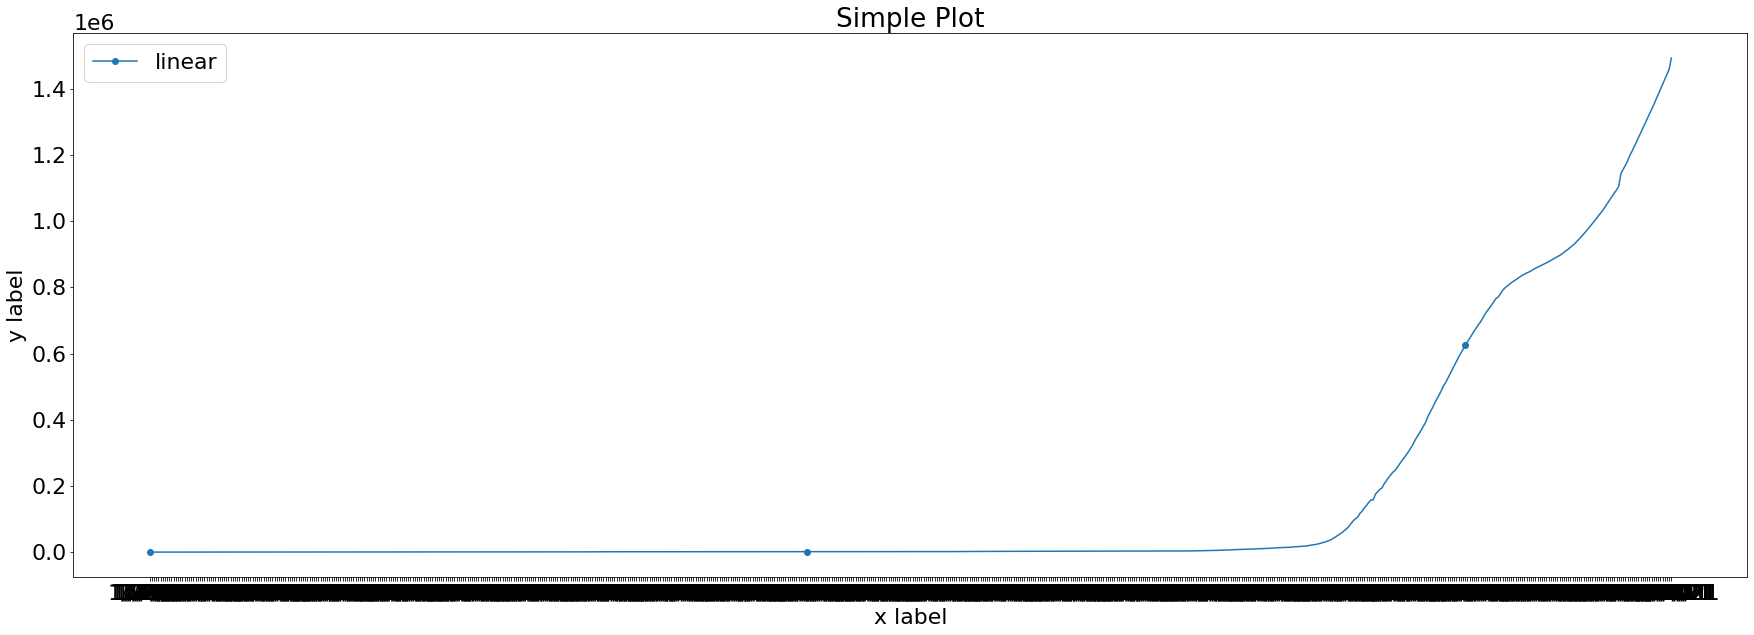

In [108]:
x = vn_d_timesr.columns
plt.figure(figsize=(30, 10))
plt.plot(x, vn_cf_timesr_lst)  # Plot some data on the (implicit) axes.
#plt.plot(x, vn_d_timesr_lst, label='quadratic')  # etc.
#plt.plot(x, vn_r_timesr_lst, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();